#Optional dataset 5

I prepare this notebook to show methods of retrieval and clustering using amazon baby dataset. 

Methods:
- KNN - it allows find k the most similar text in set of articles
- KMeans - it allows grouping similar texts into clusters

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [215]:
baby_df = pd.read_csv('amazon_baby.csv')
baby_df = baby_df.iloc[:10000]
baby_df.head(10)

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5
6,A Tale of Baby's Days with Peter Rabbit,"Lovely book, it's bound tightly so you may not...",4
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents. We were able to keep ...,5
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4


#Text processing

I check how many records in review column is NaN.

In [216]:
baby_df.review.isna().sum()

21

Then I remove all records with NaN values.

In [217]:
baby_df=baby_df.dropna(subset=['review'])
baby_df.review.isna().sum()

0

Below, I remove punctuation from text.

In [218]:
def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

print(baby_df['review'][34])


baby_df['review'] = baby_df['review'].apply(remove_punctuation)

print(baby_df['review'][34])

The book is cute, and we are huge fans of Lamaze products, however, this one leaves out some family members (no little brother) and can possibly cause hurt feelings. That said, our baby loves to play with the hands, hair and flaps!
The book is cute and we are huge fans of Lamaze products however this one leaves out some family members no little brother and can possibly cause hurt feelings That said our baby loves to play with the hands hair and flaps


TF-IDF transformation

In [219]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b",stop_words='english')
WCmatrix=vectorizer.fit_transform(baby_df['review'])

tfidf=TfidfTransformer(smooth_idf=False,norm=None)
TFIDFmatrix =tfidf.fit_transform(WCmatrix)


#Retrieval using K-nearest neighbor search

K Nearest Neighbour (KNN) is one of the algorithms that calculates the distance between the query observation and each data point in the dataset and finds K the closest observations. It can be use for finding K the most similar opinion in my dataset.

Below I choose one opinion and it's about book - "A Tale of Baby's Days with Peter Rabbit". Then I try to find the most similar to these. I expect that they will be opininons with the same rate and about books.

In [220]:

book= baby_df[(baby_df['name'] == "A Tale of Baby's Days with Peter Rabbit")]
book

,name,review,rating
6,A Tale of Baby's Days with Peter Rabbit,Lovely book its bound tightly so you may not b...,4


In [221]:
book_index = book.index[0]
book_index

6

Below, I count distance to 5 nearest neighbors this book using euclidean metrics. In fact I get 4 neighbors becuse first is my book, so distance is equals 0.

In [222]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5, algorithm='brute',metric='euclidean').fit(TFIDFmatrix)
distances, indices = nbrs.kneighbors(TFIDFmatrix[book_index])
print(distances,indices)

[[ 0.         33.73064801 33.76981121 33.81303367 33.81333884]] [[   6 1292 4277 7182  809]]


In [223]:
review_index = []
for i in range(0,5):
  review_index.append(indices[0][i])
print(review_index)

for i in review_index:
  print(baby_df['name'][i])
  print(baby_df['review'][i])
  print(baby_df['rating'][i])
  print("====================")


[6, 1292, 4277, 7182, 809]
A Tale of Baby's Days with Peter Rabbit
Lovely book its bound tightly so you may not be able to add alot of photoscards aside from the designated spaces in the book Shop around before you purchase as it is currently listed at Barnes  Noble for 2995
4
Munchkin Mozart Magic Cube
Im grandma and I purchased the Munchkin Mozart Magic Cube for my grandbaby It is precious The bright colors light up and the music is beautiful I love the way my grandbaby can choose various instruments to play the melodyI give this toy 5 stars It was worth purchasingEnjoy
5
Baby Bjorn Baby Carrier - Navy
Although the carrier is very comfortable for periods of 45 minutes or less I find I only use it for walking or shopping I cant sit with it on because my baby hates getting her legs squished I cant do any chores that require bending for the same reason plus having to brace her head with one hand is awkward while trying to get work done I tried vacuuming once which worked until I hit her

I got opinions which are the closest neighbors of given. But the result isn't well and as I expect. I have opinions about products which aren't connected with book. Also rates are very differen.

So, my next step is attempt to use another metrice - cosine.


In [224]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='brute',metric='cosine').fit(TFIDFmatrix)
distances, indices = nbrs.kneighbors(TFIDFmatrix[book_index])
print(distances,indices)

[[0.         0.81426146 0.8227532  0.82643842 0.8282095 ]] [[  6  43 190 206  46]]


In [225]:
review_index_cosine = []
for i in range(0,5):
  review_index_cosine.append(indices[0][i])
print(review_index_cosine)

for i in review_index_cosine:
  print(baby_df['name'][i])
  print(baby_df['review'][i])
  print(baby_df['rating'][i])
  print("====================")

[6, 43, 190, 206, 46]
A Tale of Baby's Days with Peter Rabbit
Lovely book its bound tightly so you may not be able to add alot of photoscards aside from the designated spaces in the book Shop around before you purchase as it is currently listed at Barnes  Noble for 2995
4
SoftPlay Peek-A-Boo Where's Elmo A Children's Book
I bought two for recent baby showers  The book is soft and interactive great for any baby and the bright colors are beautiful  Lastly who doesnt love Elmo
5
Sassy Who Loves Baby? Photo Album Book with teether handle
I was concerned about the chemical content of this plastic book since a baby will undoubtedly stick it in his mouth I emailed Sassy and got a reply saying that this was BPA PVC and Phtalates free I can breathe a sigh of relief when I hand this to our babysoon
5
My Quiet Book, Fabric Activity Book for Children
Well made and quite a few different texturesToddler loved this book and Mom approved tooEveryone was happy with this selection
5
SoftPlay Peek-A-Boo 

Now, I got reviews only about book with high rate as given book - "A Tale of Baby's Days with Peter Rabbit".

Then, I want to try different method of searching similar elements in set.

#Clustering using KMeans

K-means clustering is one of the unsupervised machine learning algorithms. The K-means clustering algorithm tries to group similar items in the form of clusters. The number of groups is represented by K.



###Elbow method
It's method which allows find the optimal number of clusters. To do that we use inertia_ which is sum of squared distances of samples to their closest cluster center. We count it for some number of K and then plot the result. Our optimal K number is in the "elbow of the curve".  



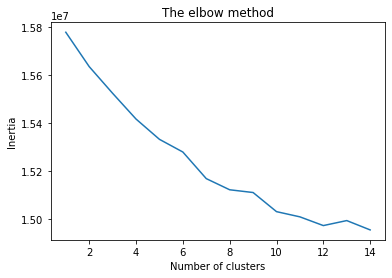

In [226]:
from sklearn.cluster import KMeans
inertia_list = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 100, n_init =30, random_state = 12)
    kmeans.fit(TFIDFmatrix)
    inertia_list.append(kmeans.inertia_)

plt.plot(range(1, 15), inertia_list)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

But in this case, this method seems to be useless, becuse plot looks as if doesn't have elbow. So, I choose k = 5, becuse I have set with 5 values of ratings and I hope it might be good way to find optimal number of clusters.

In [227]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 5,init='k-means++',random_state=0)
model.fit(TFIDFmatrix)
labels = model.labels_
baby_df['Cluster'] = model.labels_
baby_df.head(30)

,name,review,rating,Cluster
0,Planetwise Flannel Wipes,These flannel wipes are OK but in my opinion n...,3,3
1,Planetwise Wipe Pouch,it came early and was not disappointed i love ...,5,3
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,3
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase I h...,5,3
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried nonstop when I tried...,5,3
5,Stop Pacifier Sucking without tears with Thumb...,When the Binky Fairy came to our house we didn...,5,3
6,A Tale of Baby's Days with Peter Rabbit,Lovely book its bound tightly so you may not b...,4,3
7,"Baby Tracker&reg; - Daily Childcare Journal, S...",Perfect for new parents We were able to keep t...,5,3
8,"Baby Tracker&reg; - Daily Childcare Journal, S...",A friend of mine pinned this product on Pinter...,5,3
9,"Baby Tracker&reg; - Daily Childcare Journal, S...",This has been an easy way for my nanny to reco...,4,3


Here, I want to show amount of samples in each cluster.

In [228]:
baby_df.groupby(['Cluster'])['review'].count()

Cluster
0       2
1       8
2     840
3    8665
4     464
Name: review, dtype: int64

3th cluster has the most samples and "A Tale of Baby's Days with Peter Rabbit" is also in this cluster. 

Below, I chceck if the closest neighbors of my book there are in 3th clusters. And I see yes.

In [229]:
book= baby_df[baby_df['name'] == "A Tale of Baby's Days with Peter Rabbit"]

for i in review_index_cosine:
  print("Name: ", baby_df['name'][i])
  print("Cluster: ", baby_df['Cluster'][i])
  print("====================")

Name:  A Tale of Baby's Days with Peter Rabbit
Cluster:  3
Name:  SoftPlay Peek-A-Boo Where's Elmo A Children's Book
Cluster:  3
Name:  Sassy Who Loves Baby? Photo Album Book with teether handle
Cluster:  3
Name:  My Quiet Book, Fabric Activity Book for Children
Cluster:  3
Name:  SoftPlay Peek-A-Boo Where's Elmo A Children's Book
Cluster:  3


Below, there are some samples from 3th cluster.

In [230]:
baby_df[baby_df['Cluster'] == 3].sample(20)

,name,review,rating,Cluster
2627,BABYBJORN Little Potty - Red,Got this potty today and I am so glad that I a...,5,3
9995,Munchkin Twisty Figure 8 Teether,There no sound or anything and look like there...,1,3
9096,Playtex Premium Nurser Newborn Gift Set,I originally got the Avents and they were awfu...,5,3
1375,Munchkin Mozart Magic Cube,got this for my granddaughter enjoyed by the w...,4,3
6642,Leachco Snoogle Total Body Pillow,Was slightly doubtful about its use So many o...,5,3
5603,"Playtex Drop-Ins Disposable Bottle Liners, 4 O...",Well I really wanted to use the liners to avoi...,2,3
818,Safety 1st Power Strip Cover,My little one looooves plug ins This product ...,4,3
30,"Lamaze Peekaboo, I Love You",Beautiful little book A great little short st...,5,3
9533,Snap 'N Go Infant Car Seat Carrier,Loved this stroller My friends are envious I...,5,3
5774,"Leachco Safer Bather Infant Bath Pad, Blue Fish",When I brought my daughter home from the hospi...,5,3


The samples above show that in the cluster there are items of different categories and rate. 

#Conclusion

For this dataset the better method of finding the most similar text is KNN with cosine distance. Kmeans doesn't work well in this case.